In [1]:
#  EXPLORATORY DATA ANALYSIS - FINAL DATASET
# ==========================================
# Autor: Luna ✨
# Dataset: FinalDataHarmonization.csv
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configuración estética
sns.set_theme(style="whitegrid", palette="viridis", font_scale=1.1)
plt.rcParams["figure.figsize"] = (8, 5)

# Cargamos dataset final
fp = "../FilteredData/FinalDataHarmonization.csv"
df = pd.read_csv(fp)

print(f"✅ Dataset cargado: {df.shape[0]} filas × {df.shape[1]} columnas")
display(df.head())

✅ Dataset cargado: 21245 filas × 10 columnas


,orbital_period_days,transit_duration_hours,transit_depth_ppm,planet_radius_earth,equilibrium_temperature_K,insolation_flux_Earth,stellar_radius_solar,stellar_temperature_K,final_disposition,source_mission
0,9.488036,2.95750,615.8,2.26,793.0,93.59,0.927,5455.0,CONFIRMED,KEPLER
1,54.418383,4.50700,874.8,2.83,443.0,9.11,0.927,5455.0,CONFIRMED,KEPLER
2,19.899140,1.78220,10829.0,14.60,638.0,39.30,0.868,5853.0,CANDIDATE,KEPLER
3,1.736952,2.40641,8079.2,33.46,1395.0,891.96,0.791,5805.0,FALSE_POSITIVE,KEPLER
4,2.525592,1.65450,603.3,2.75,1406.0,926.16,1.046,6031.0,CONFIRMED,KEPLER


In [2]:
# Información general y nulos
print("=== Info general ===")
print(df.info())
print("\n=== Valores nulos (absoluto) ===")
print(df.isna().sum())

print("\n=== Porcentaje de nulos ===")
print((df.isna().mean() * 100).round(2))

=== Info general ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21245 entries, 0 to 21244
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   orbital_period_days        21245 non-null  float64
 1   transit_duration_hours     21245 non-null  float64
 2   transit_depth_ppm          21245 non-null  float64
 3   planet_radius_earth        21245 non-null  float64
 4   equilibrium_temperature_K  21245 non-null  float64
 5   insolation_flux_Earth      21245 non-null  float64
 6   stellar_radius_solar       21245 non-null  float64
 7   stellar_temperature_K      21245 non-null  float64
 8   final_disposition          21245 non-null  object 
 9   source_mission             21245 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.6+ MB
None

=== Valores nulos (absoluto) ===
orbital_period_days          0
transit_duration_hours       0
transit_depth_ppm            0
planet_radius_

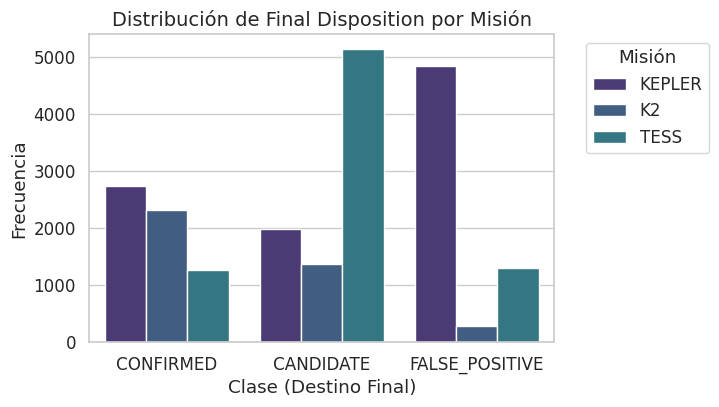

final_disposition
CANDIDATE         0.400
FALSE_POSITIVE    0.302
CONFIRMED         0.298
Name: proportion, dtype: float64


In [4]:
# DISTRIBUCIÓN DEL TARGET
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="final_disposition", hue="source_mission")
plt.title("Distribución de Final Disposition por Misión", fontsize=14)
plt.xlabel("Clase (Destino Final)")
plt.ylabel("Frecuencia")
plt.legend(title="Misión", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

print(df["final_disposition"].value_counts(normalize=True).round(3))

In [5]:
# ANÁLISIS DESCRIPTIVO NUMÉRICO
num_cols = df.select_dtypes(include=[np.number]).columns
print("Columnas numéricas:", list(num_cols))

display(df[num_cols].describe().T)

Columnas numéricas: ['orbital_period_days', 'transit_duration_hours', 'transit_depth_ppm', 'planet_radius_earth', 'equilibrium_temperature_K', 'insolation_flux_Earth', 'stellar_radius_solar', 'stellar_temperature_K']


,count,mean,std,min,25%,50%,75%,max
orbital_period_days,21245.0,48.987300,1069.960309,-2.513479e+03,2.635737,5.890356,16.736476,1.299958e+05
transit_duration_hours,21245.0,4.313586,10.210757,-3.846216e+01,2.068883,3.145000,4.710000,1.307736e+03
transit_depth_ppm,21245.0,17736.009424,67098.770689,-2.647780e+05,327.600000,1400.000000,9913.000000,1.541400e+06
planet_radius_earth,21245.0,51.806777,2025.886733,-8.866017e+00,2.000000,5.036060,13.960000,2.003460e+05
equilibrium_temperature_K,21245.0,2921.823346,10269.860537,-1.131995e+06,695.129031,1125.000000,1827.000000,2.635244e+05
insolation_flux_Earth,21245.0,4429.904832,105287.215845,-2.945271e+05,34.940000,233.780000,1203.770000,1.094755e+07
stellar_radius_solar,21245.0,1.514107,4.273651,-4.084629e+00,0.820000,1.050000,1.500000,2.299080e+02
stellar_temperature_K,21245.0,5636.340618,1203.120185,1.079574e+03,5144.900000,5700.000000,6122.000000,5.000000e+04


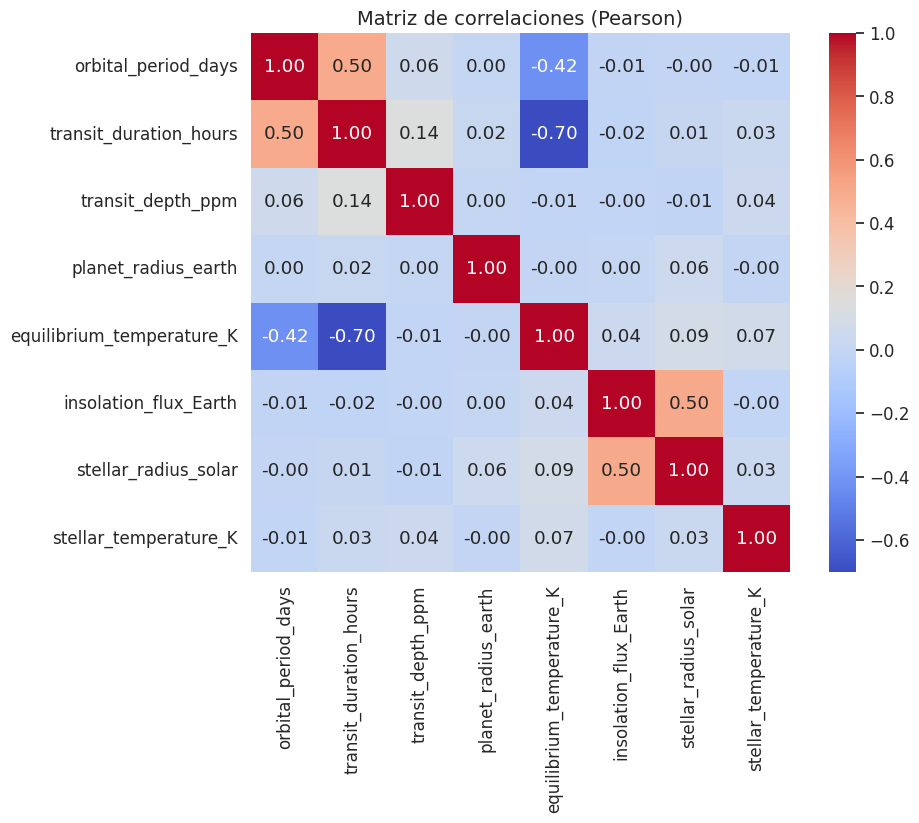

In [6]:
# CORRELACIONES ENTRE VARIABLES
corr = df[num_cols].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlaciones (Pearson)", fontsize=14)
plt.show()

# Guardar correlaciones por si queremos inspeccionarlas luego
corr.to_csv("../FilteredData/EDA_correlations_Final.csv")

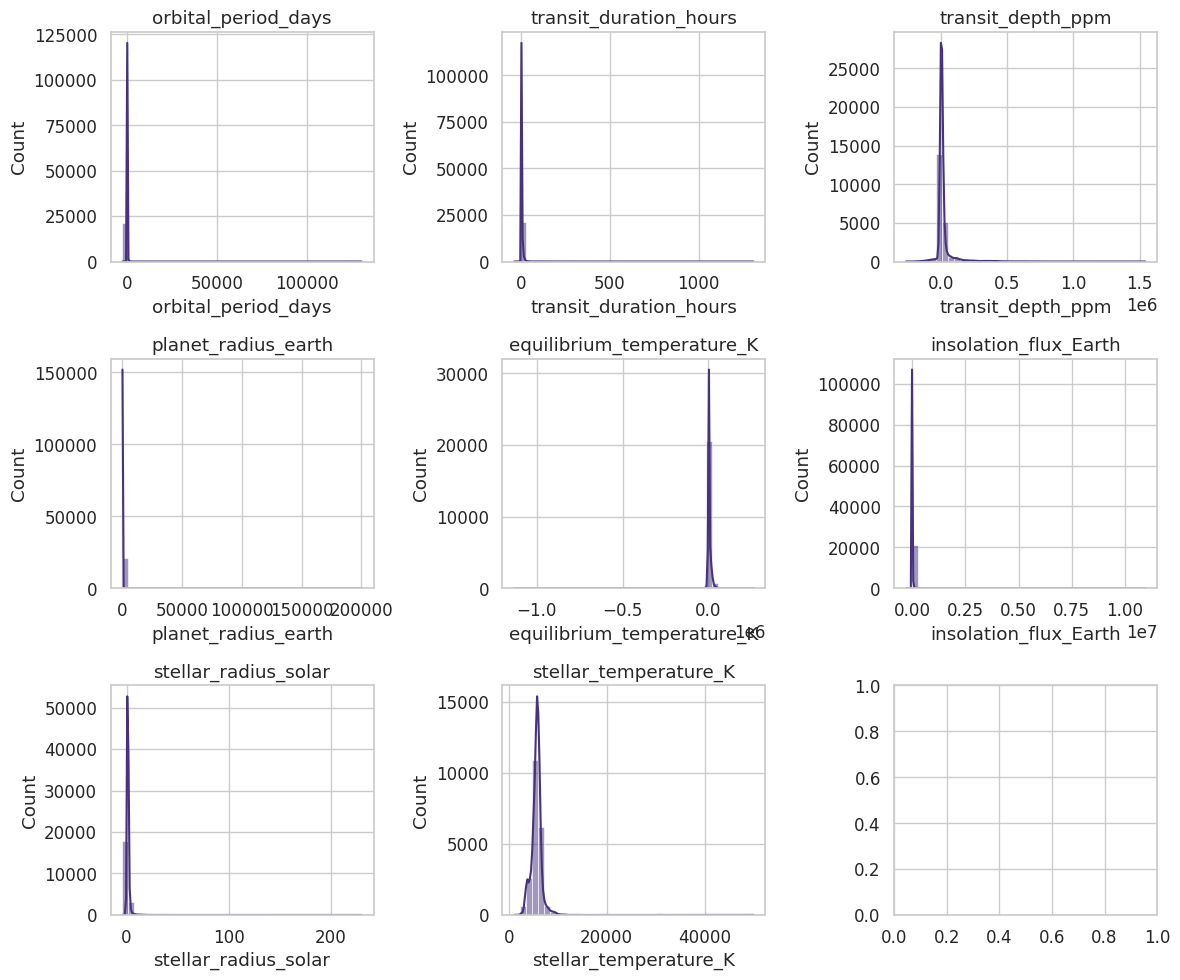

In [7]:
# DISTRIBUCIONES PRINCIPALES
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols[:9]):  # muestra las 9 primeras
    sns.histplot(df[col], bins=40, kde=True, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

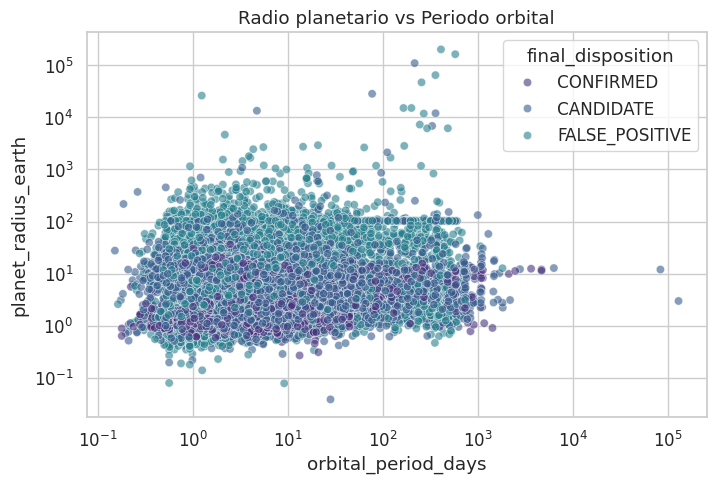

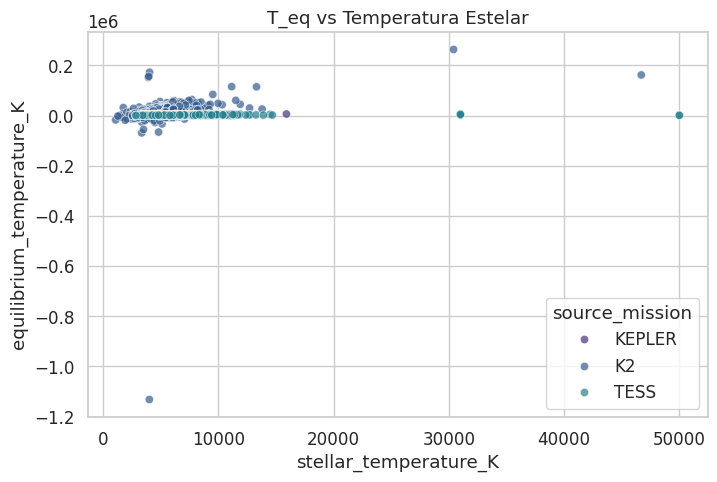

In [9]:
# RELACIONES FÍSICAS CLAVE
sns.scatterplot(data=df, x="orbital_period_days", y="planet_radius_earth",
                hue="final_disposition", alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.title("Radio planetario vs Periodo orbital")
plt.show()

sns.scatterplot(data=df, x="stellar_temperature_K", y="equilibrium_temperature_K",
                hue="source_mission", alpha=0.7)
plt.title("T_eq vs Temperatura Estelar")
plt.show()

In [10]:
# CONCLUSIÓN RÁPIDA
print("=== Verificación final ===")
print(f"Nulos totales en el dataset: {df.isna().sum().sum()}")
print("Distribución por misión:")
print(df['source_mission'].value_counts())

print("\nDistribución por clase:")
print(df['final_disposition'].value_counts())

print("\n Dataset listo para entrenamiento ML :D")

=== Verificación final ===
Nulos totales en el dataset: 0
Distribución por misión:
source_mission
KEPLER    9564
TESS      7699
K2        3982
Name: count, dtype: int64

Distribución por clase:
final_disposition
CANDIDATE         8492
FALSE_POSITIVE    6426
CONFIRMED         6327
Name: count, dtype: int64

 Dataset listo para entrenamiento ML :D
